In [1]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/38.1 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.5/38.1 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.8/38.1 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.3/38.1 MB 5.7 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.1 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.2/38.1 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/38.1 MB 7.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.2/38.1 MB 7.6 MB/s eta 0:00:05
   --- ---------

In [19]:
import cv2
import imghdr
import imagesize
from matplotlib import pyplot as plt

In [141]:
data_dir = 'CarneDataset' 

In [142]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [143]:
image_exts[3]

'png'

In [146]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

train_01
train_02
train_03
train_04
train_05
train_06
train_07
train_08
CLASS_01
CLASS_02
CLASS_03
CLASS_04
CLASS_05
CLASS_06
CLASS_07
CLASS_08


In [151]:
img=cv2.imread(os.path.join('CarneDataset','1train','train_02','14-CAPTURE_20220531_143820_956.PNG'))

In [152]:
img.shape

(216, 384, 3)

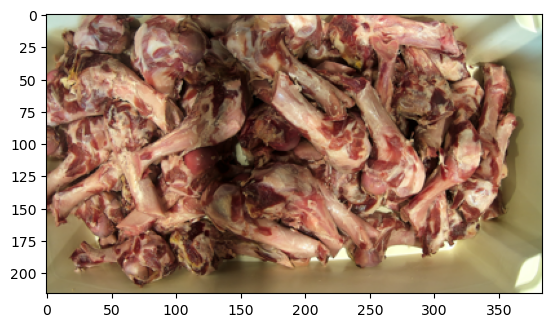

In [153]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [23]:
import numpy as np

In [191]:
data = tf.keras.utils.image_dataset_from_directory('CarneDataset')

Found 2443 files belonging to 2 classes.


In [192]:
data_iterator = data.as_numpy_iterator()

In [193]:
batch = data_iterator.next()

In [194]:
batch[1]

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

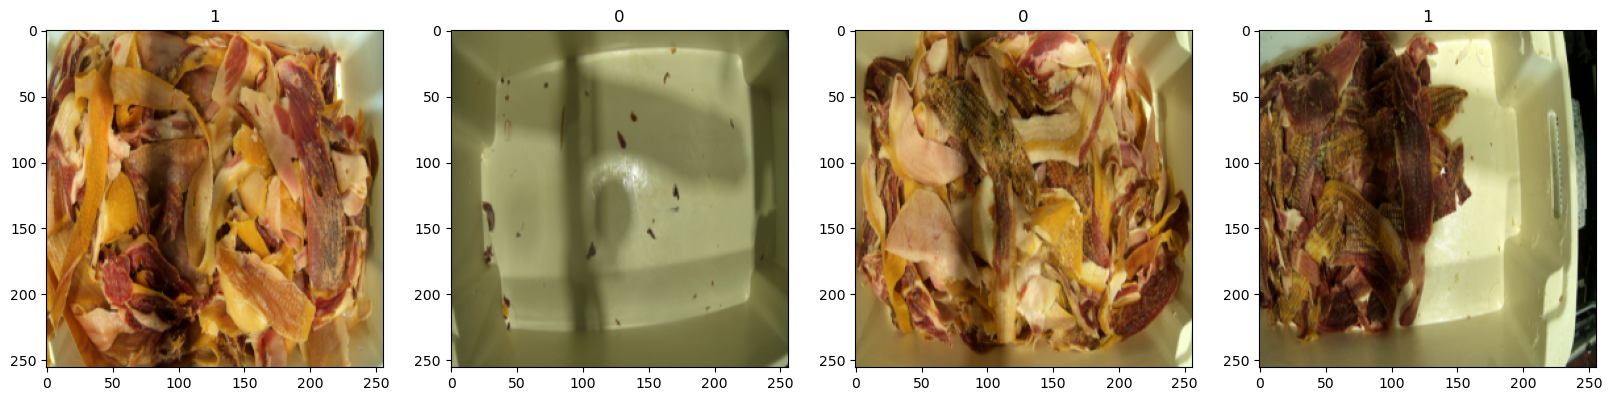

In [195]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [196]:
data = data.map(lambda x,y: (x/255, y))

In [197]:
scaled_iterator=data.as_numpy_iterator()

In [198]:
batch = scaled_iterator.next()

In [199]:
batch[0].min()

0.0

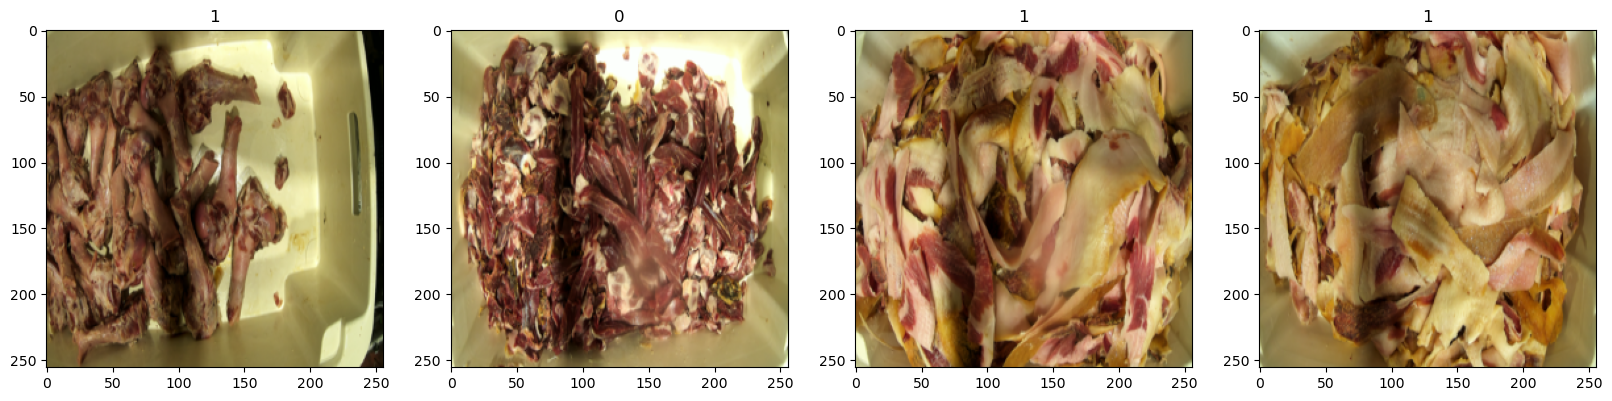

In [200]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [201]:
len(data)

77

In [202]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [203]:
test_size+val_size+train_size

77

In [204]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [205]:
len(test)

8

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [207]:
model = Sequential()

In [208]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [209]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [210]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [211]:
logdir='logs'

In [212]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [213]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
53/53 [==============================] - 104s 2s/step - loss: 0.6869 - accuracy: 0.6427 - val_loss: 0.6252 - val_accuracy: 0.6816
Epoch 2/20
53/53 [==============================] - 100s 2s/step - loss: 0.6494 - accuracy: 0.6651 - val_loss: 0.6305 - val_accuracy: 0.6855
Epoch 3/20
53/53 [==============================] - 100s 2s/step - loss: 0.6430 - accuracy: 0.6568 - val_loss: 0.6243 - val_accuracy: 0.6836
Epoch 4/20
53/53 [==============================] - 100s 2s/step - loss: 0.6346 - accuracy: 0.6633 - val_loss: 0.6178 - val_accuracy: 0.6914
Epoch 5/20
53/53 [==============================] - 99s 2s/step - loss: 0.6254 - accuracy: 0.6675 - val_loss: 0.6807 - val_accuracy: 0.6641
Epoch 6/20
53/53 [==============================] - 100s 2s/step - loss: 0.6232 - accuracy: 0.6621 - val_loss: 0.6066 - val_accuracy: 0.7031
Epoch 7/20
53/53 [==============================] - 102s 2s/step - loss: 0.6083 - accuracy: 0.6651 - val_loss: 0.6415 - val_accuracy: 0.6484
Epoch 8/20
53/

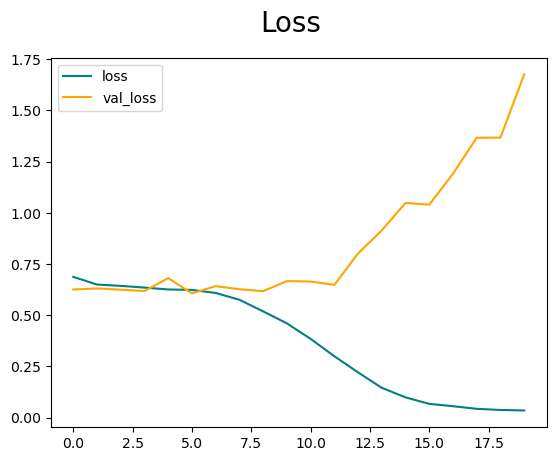

In [215]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

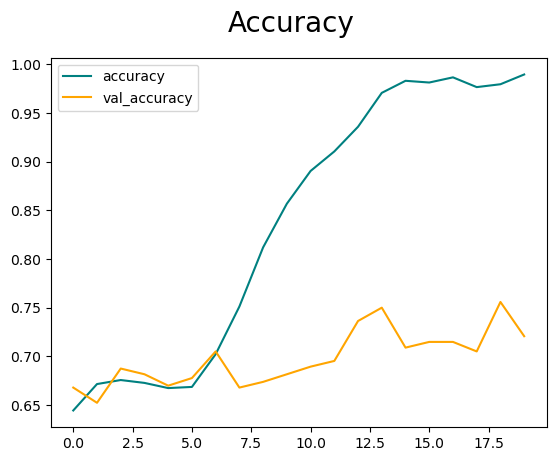

In [106]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [216]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [217]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [218]:
len (test)

8

In [219]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 396ms/step


In [220]:
print(f'Presicion:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Presicion:0.550000011920929, Recall:0.39759036898612976, Accuracy:0.672340452671051


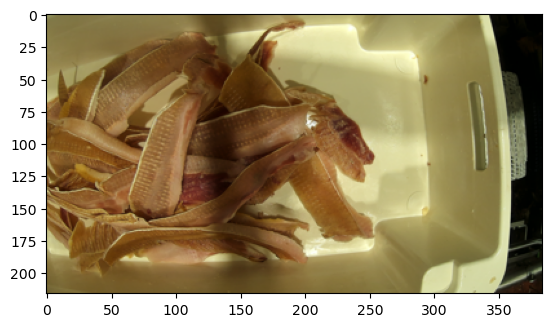

In [281]:
img = cv2.imread('imagen.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

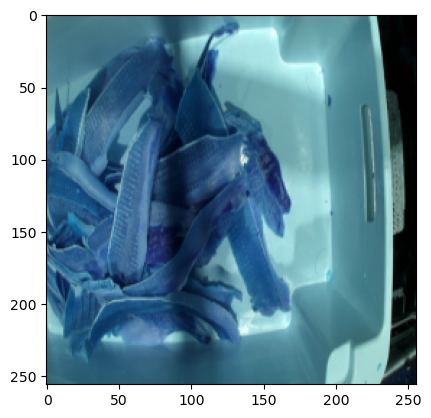

In [282]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [283]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [284]:
yhat

array([[0.9987762]], dtype=float32)

In [285]:
if yhat > 0.5: 
    print(f'Predicted class is carne')
else:
    print(f'Predicted class is hueso')

Predicted class is carne
